In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
from sklearn.model_selection import train_test_split

wine_data=pd.read_csv('Assignment10Datasets/Part4 Wine Dataset/Winemag-data_first150k Dataset.csv')

1)	Use the wine dataset to solve the below mentioned problems using the concept of Univariate plotting

•	To find the wines that are from the US along with their points on a histogram.

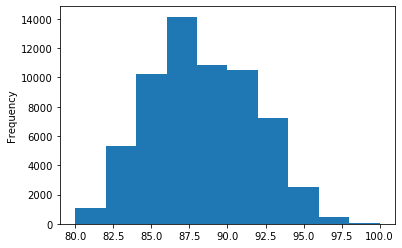

In [2]:
us_wines=wine_data[wine_data['country']=='US']   #stores the dataframe where the country value is US
us_wines['points'].plot.hist()    #generating a histogram based on points

•	To sort the points and represent them on an area graph.

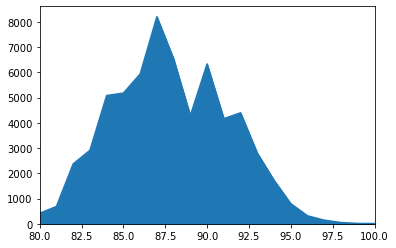

In [3]:
us_wines['points'].value_counts().sort_index().plot.area()    #performing sort and displaying it on area graph
#Assuming we need to display an area graph on country==us if it is needed for whole dataset the below commented line can be executed
#wine_data['points'].value_counts().sort_index().plot.area()

2)	Use the wine dataset to solve the below mentioned problems using the concept of Bivariate plotting

•	Plot a hexplot graph to display wine data that have the prices below a certain value.

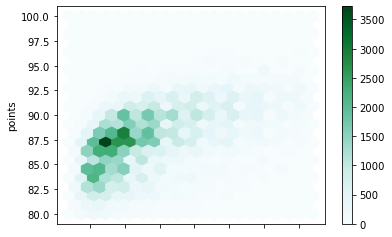

In [4]:
wine_data[wine_data['price'] < 75].plot.hexbin(x='price', y='points', gridsize=20)    #Displaying a hexplot those have a price below 75

•	Plot a scatterplot to represent the wine points for the wines that have their prices below 100$.

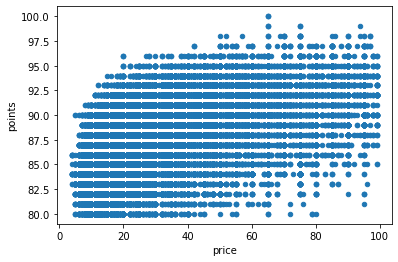

In [5]:
wine_data[wine_data['price'] < 100].plot.scatter(x='price', y='points')    #Scatter plot to display wine points those price is below 100

3)	Use the wine dataset

•	To group the data with respect to the ‘points’ column.

In [6]:
wine_group=wine_data.groupby('points')  #group by points
wine_group.groups

{80: Int64Index([  7793,   7794,   7795,  10000,  10001,  10002,  10003,  10004,
              10005,  10500,
             ...
             149239, 150055, 150056, 150558, 150559, 150560, 150561, 150760,
             150761, 150905],
            dtype='int64', length=898),
 81: Int64Index([  2142,   2143,   2144,   5608,   5609,   6000,   6001,   6002,
               6003,   7782,
             ...
             150557, 150756, 150757, 150758, 150759, 150900, 150901, 150902,
             150903, 150904],
            dtype='int64', length=1502),
 82: Int64Index([  2136,   2137,   2138,   2139,   2140,   2141,   5594,   5595,
               5596,   5597,
             ...
             150890, 150891, 150892, 150893, 150894, 150895, 150896, 150897,
             150898, 150899],
            dtype='int64', length=4041),
 83: Int64Index([  1850,   1851,   1852,   1853,   1854,   1855,   1856,   1857,
               1858,   1859,
             ...
             150876, 150877, 150878, 150879, 1508

•	To group the data by ‘points’ in the ascending order of ‘price’.

In [7]:
wine_data_price_asc=wine_data.sort_values('price',ascending=True)  #group by points sort values is used to display the data index whose price is in ascending order.
wine_group_points=wine_data_price_asc.groupby('points')
wine_group_points.groups
#Nan not managed

{80: Int64Index([103916,  36356,   7794, 135699, 117821, 141924,  68229,  66009,
             143677, 113019,
             ...
             108671, 108678, 108681, 117812, 135137, 135212, 137020, 141915,
             142696, 150055],
            dtype='int64', length=898),
 81: Int64Index([103912,   5609,  36352, 117809, 134909, 143670,  83525, 135123,
             117807, 136501,
             ...
             119274, 119404, 127348, 127596, 129178, 129179, 129453, 135124,
             142692, 149238],
            dtype='int64', length=1502),
 82: Int64Index([141429, 127235, 136436,  56241, 114904,  69542, 136204, 120212,
             142688, 141627,
             ...
             129167, 129536, 129539, 130435, 130610, 131019, 134829, 134835,
             135390, 144598],
            dtype='int64', length=4041),
 83: Int64Index([  1858, 114167, 143406, 140847, 139254,  23657, 140838, 116402,
              64862,  64728,
             ...
             142364, 142368, 142371, 142375, 1431

•	To group ‘country’ on the basis of length, minimum and maximum.

In [8]:
group_country=wine_data      #Create a copy dataframe
group_country['country_len']=wine_data['country'].str.len()      #Adding an additional column country_len which will be saving the length of the country string
group_country=group_country.groupby('country_len')               #Groupy by length of the country
group_country.groups                                             #Display groups

{2.0: Int64Index([     0,      2,      3,      8,      9,     11,     12,     14,
                 15,     16,
             ...
             150879, 150883, 150884, 150886, 150889, 150892, 150896, 150914,
             150915, 150916],
            dtype='int64', length=62397),
 5.0: Int64Index([     1,      5,      6,      7,     10,     17,     21,     22,
                 32,     35,
             ...
             150901, 150902, 150903, 150904, 150905, 150920, 150922, 150925,
             150927, 150929],
            dtype='int64', length=37578),
 6.0: Int64Index([     4,     13,     18,     33,     36,     44,     51,     52,
                 53,     56,
             ...
             150912, 150913, 150917, 150918, 150919, 150921, 150923, 150924,
             150926, 150928],
            dtype='int64', length=22993),
 7.0: Int64Index([   216,    247,    331,    348,    367,    378,    384,    399,
                411,    486,
             ...
             150128, 150130, 150136, 1501

4)	Use the wine dataset

•	To display a wordcloud of the wine description.

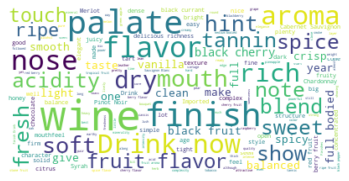

In [9]:
data = " ".join(desc for desc in wine_data.description)
wordcloud = WordCloud(max_font_size=50,background_color="white").generate(data)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

•	To display a wordcloud of the wine description of the wines from US.

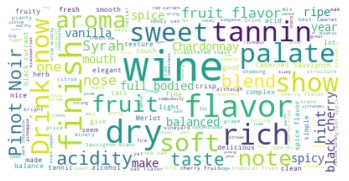

In [10]:
usa = " ".join(desc for desc in wine_data[wine_data["country"]=="US"].description)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50,background_color="white").generate(usa)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

5)	Use the wine dataset

•	To find points, variety and province of the wines, where points>90. Remove duplicates and ignore the noisy data.

In [11]:
wine_data_2=wine_data[['points','variety','province']]      #Keeps only points,variety and province column those are nedded to display
wine_data_2=wine_data_2[wine_data_2['points']>90]           #Keeps data where points are greater than 90
wine_data_2.drop_duplicates(keep='first',inplace=True)        #Remove duplicate data only keeps the first occurence 
wine_data_2

,points,variety,province
0,96,Cabernet Sauvignon,California
1,96,Tinta de Toro,Northern Spain
2,96,Sauvignon Blanc,California
3,96,Pinot Noir,Oregon
4,95,Provence red blend,Provence
...,...,...,...
147513,92,Bordeaux-style Red Blend,Western Australia
148177,94,Pinot Blanc,California
148300,92,Shiraz,Western Australia
148310,92,Cabernet Blend,Washington


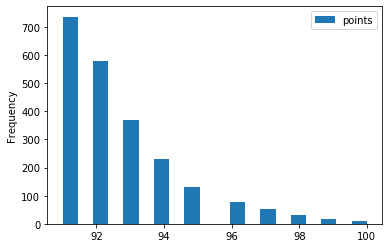

In [12]:
wine_data_2.plot(kind='hist',bins=20)      #There seems to be no noisy data available

•	To obtain a model using knn algorithm.

In [13]:
wine_data.isna().sum()         #Checking for null values

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
country_len        5
dtype: int64

In [14]:
wine_data=wine_data.dropna()      #Dropping the null values

In [15]:
wine_data.isna().sum()

Unnamed: 0     0
country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
region_2       0
variety        0
winery         0
country_len    0
dtype: int64

In [16]:
#Since we need the columns with int or float data type we will be dropping the resst of the column
#Points table is needed to be predicted so that column is not considerd
#So the knn models tries to predict the points based on the given price
X = wine_data.drop(columns=['points','country','description','designation','province','region_1','region_2','variety','winery'])
y = wine_data['points'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
knn.predict(X_test)[0:5]

array([89, 91, 88, 86, 85], dtype=int64)

In [19]:
knn.score(X_test, y_test)

0.7333418269843293